In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

params = {"axes.titlesize": 14,
          "axes.labelsize": 14,
          "font.size": 14,
          "xtick.labelsize": 14,
          "ytick.labelsize": 14,
          "legend.fontsize": 14,
          "savefig.bbox": "tight",
          "savefig.pad_inches": 0.01}
plt.rcParams.update(params)

from fiberpy.orientation import a_RSC, Shear, shear_steady_state
from scipy import integrate

# Jeffery's equation

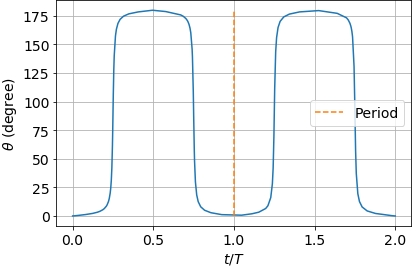

In [2]:
ar = 25
gamma = 1
L = np.array([[0, gamma], [0, 0]])
T = 2 * np.pi / gamma * (ar + 1 / ar)
phi0 = [1e-4,]

def dphi(t, phi):
    return ar ** 2 / (1 + ar ** 2) * (
        -np.sin(phi) * np.cos(phi) * L[0, 0]
        - np.sin(phi) ** 2 * L[0, 1]
        + np.cos(phi) ** 2 * L[1, 0]
        + np.sin(phi) * np.cos(phi) * L[1, 1]
    ) - 1 / (1 + ar ** 2) * (
        -np.sin(phi) * np.cos(phi) * L[0, 0]
        + np.cos(phi) ** 2 * L[0, 1]
        - np.sin(phi) ** 2 * L[1, 0]
        + np.sin(phi) * np.cos(phi) * L[1, 1]
    )

sol = integrate.solve_ivp(dphi, (0, 2 * T), phi0, method="Radau")
sol.y = np.abs((sol.y + np.pi) % (2 * np.pi ) - np.pi)

plt.plot(sol.t / T, np.rad2deg(sol.y[0, :]))
plt.plot([1, 1], [0, 180], "--", label="Period")
plt.xlabel("$t/T$")
plt.ylabel(r"$\theta$ (degree)")
plt.grid()
plt.legend()

plt.tight_layout()

# Folgar-Tucker

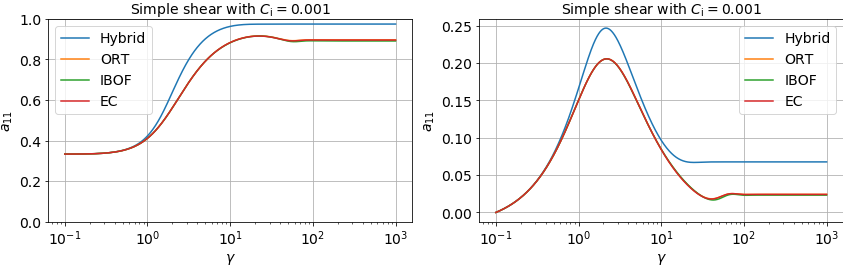

In [3]:
ci = 1e-3
kappa = 1
ar = 25
t = np.logspace(-1, 3, 1000)
a0 = np.eye(3)/3

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
a = a_RSC(a0, t, Shear, ci, kappa, ar, closure="hybrid")
ax[0].semilogx(t, a[0, :], "-", label="Hybrid")
ax[1].semilogx(t, a[2, :], "-", label="Hybrid")

a = a_RSC(a0, t, Shear, ci, kappa, ar, closure="orthotropic")
ax[0].semilogx(t, a[0, :], "-", label="ORT")
ax[1].semilogx(t, a[2, :], "-", label="ORT")

a = a_RSC(a0, t, Shear, ci, kappa, ar, closure="invariants")
ax[0].semilogx(t, a[0, :], "-", label="IBOF")
ax[1].semilogx(t, a[2, :], "-", label="IBOF")

a = a_RSC(a0, t, Shear, ci, kappa, ar, closure="exact")
ax[0].semilogx(t, a[0, :], "-", label="EC")
ax[1].semilogx(t, a[2, :], "-", label="EC")

ax[0].set_xlabel("$\gamma$")
ax[1].set_xlabel("$\gamma$")
ax[0].set_ylabel("$a_{11}$")
ax[1].set_ylabel("$a_{11}$")
ax[0].set_title("Simple shear with $C_\mathrm{i}=%g$" % ci)
ax[1].set_title("Simple shear with $C_\mathrm{i}=%g$" % ci)
ax[0].grid()
ax[1].grid()
ax[0].set_ylim(0, 1)
ax[0].legend()
ax[1].legend()

fig.tight_layout()

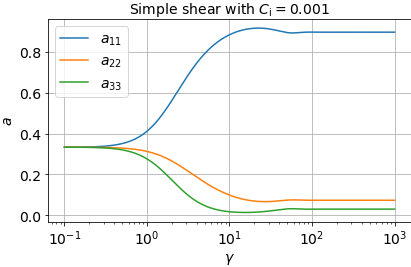

In [4]:
ci = 1e-3
kappa = 1
ar = 25
t = np.logspace(-1, 3, 1000)
a0 = np.eye(3) / 3

a = a_RSC(a0, t, Shear, ci, kappa, ar, closure="orthotropic")
plt.semilogx(t, a[0, :], "-", label="$a_{11}$")
plt.semilogx(t, a[4, :], "-", label="$a_{22}$")
plt.semilogx(t, a[8, :], "-", label="$a_{33}$")

plt.xlabel("$\gamma$")
plt.ylabel("$a$")
plt.title("Simple shear with $C_\mathrm{i}=%g$" % ci)
plt.grid()
plt.legend()
plt.tight_layout()

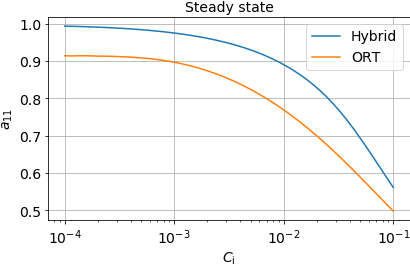

In [5]:
ar = 25
ci = np.logspace(-4, -1, 50)
a_hybrid = np.zeros((len(ci), 9))
a_orthotropic = np.zeros((len(ci), 9))

for i in range(len(ci)):
    a_hybrid[i, :] = shear_steady_state(ci[i], ar, closure="hybrid")
    a_orthotropic[i, :] = shear_steady_state(ci[i], ar, closure="orthotropic")
    
plt.semilogx(ci, a_hybrid[:, 0], "-", label="Hybrid")
plt.semilogx(ci, a_orthotropic[:, 0], "-", label="ORT")

plt.xlabel("$C_\mathrm{i}$")
plt.ylabel("$a_{11}$")
plt.grid()
plt.title("Steady state")
plt.legend()

plt.tight_layout()

# RSC model

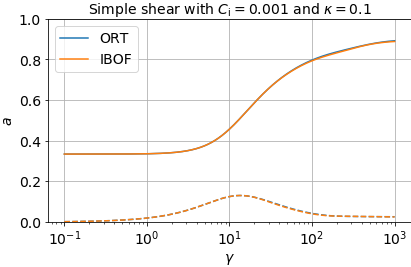

In [5]:
ci = 1e-3
kappa = 0.1
r = 25
t = np.logspace(-1, 3, 1000)
a0 = np.eye(3) / 3

a = a_RSC(a0, t, Shear, ci, kappa, r, closure="orthotropic")
plt.semilogx(t, a[0, :], "C0-", label="ORT")
plt.semilogx(t, a[2, :], "C0--")

a = a_RSC(a0, t, Shear, ci, kappa, r, closure="invariants")
plt.semilogx(t, a[0, :], "C1-", label="IBOF")
plt.semilogx(t, a[2, :], "C1--")

plt.xlabel("$\gamma$")
plt.ylabel("$a$")
plt.title("Simple shear with $C_\mathrm{i}=%g$ and $\kappa=%g$" % (ci, kappa))
plt.grid()
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()

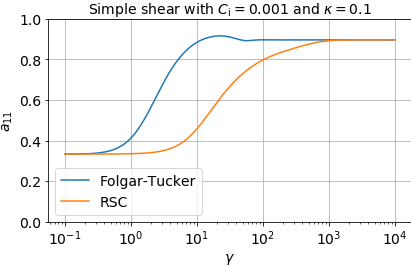

In [6]:
ci = 1e-3
ar = 25
t = np.logspace(-1, 4, 1000)
a0 = np.eye(3) / 3

kappa = 1
a = a_RSC(a0, t, Shear, ci, kappa, ar)
plt.semilogx(t, a[0, :], "-", label="Folgar-Tucker")

kappa = 0.1
a = a_RSC(a0, t, Shear, ci, kappa, ar)
plt.semilogx(t, a[0, :], "-", label="RSC")

plt.xlabel("$\gamma$")
plt.ylabel("$a_{11}$")
plt.title("Simple shear with $C_\mathrm{i}=%g$ and $\kappa=%g$" % (ci, kappa))
plt.grid()
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()